### Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Question a

<font size = 3 color = black face = "Times New Roman">First we want to generate the matrix A, we define a function to generate it

In [2]:
# Define the N rank second difference matrix.
def matrix_a(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A

In [3]:
# Define a function to do gauss_seidel method with epsilon is 1e-10
def gauss_seidel(A, b, x=None, max_iterations = 10000, epsilon = 1e-10):
    # Create an initial guess if needed                                                            
    if x is None:
        x = np.zeros_like(b)
  
    for it_count in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=epsilon):
            break
        x = x_new
    return x, it_count

In [4]:
N = 5
A = matrix_a(N)
x_a = np.random.normal(size = (N,1))
b = np.dot(A, x_a)
x_init = np.zeros_like(b)
x, iteration = gauss_seidel(A, b, x_init)
print('True solution is\n',x_a)
print('Solution by using gauss_seidel method is\n',x)
print('The iteration is', iteration)

True solution is
 [[ 0.61401899]
 [ 1.30669016]
 [ 1.66857196]
 [-1.25480669]
 [-2.36333913]]
Solution by using gauss_seidel method is
 [[ 0.61401901]
 [ 1.3066902 ]
 [ 1.66857199]
 [-1.25480666]
 [-2.36333912]]
The iteration is 59


Text(0.5, 1.0, 'N-iteration')

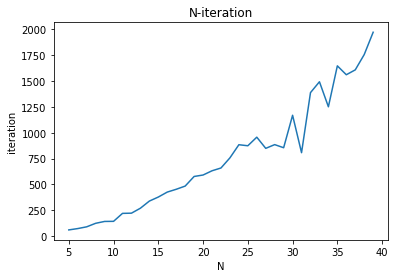

In [5]:
#Get n for test
n_test = np.array([i for i in range(5, 40)])
#Get iteration for the test n
iteration_test = np.zeros_like(n_test)
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = gauss_seidel(A, b, x_init)
    iteration_test[n-5] = iteration
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration')
plt.title('N-iteration')

<font size = 3 color = black face = "Times New Roman"> Form the figure we are easy to know that when N is larger, the iteration is larger.

#### Question b

<font size = 3 color = black face = "Times New Roman">Obviously, Gauss-Seidel method converge, as expected, faster than the Jacobi method